In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [3]:
sys.path.insert(1, '../src')
from plant import Plant
from sun import Sun
from state import State
from run import *
plt.rcParams['figure.figsize'] = [20, 10]

# Toy Model

Toy model for optical part of a solar power tower plant in 2 dimensions for a start.

## Toy Model of the Sun

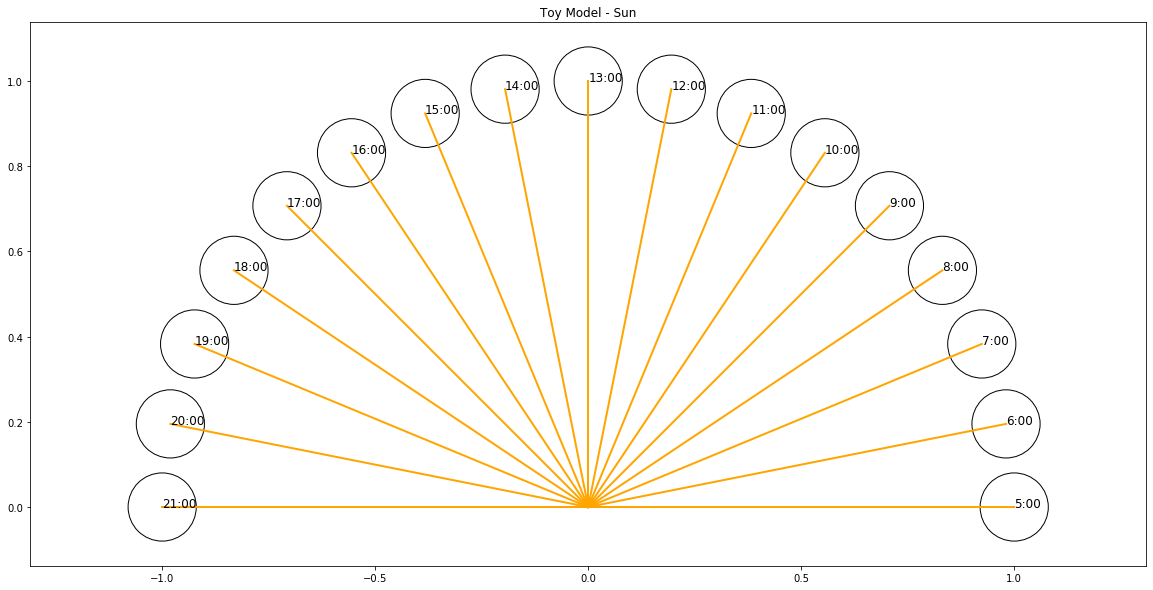

In [4]:
sun = Sun()
sun.draw()

## Plant and Layout Descriptions

Initialize some plant with some layout. See descriptions in `../data/plants/` and `../data/layouts/` in JSON format.

In [5]:
plant = Plant(plant_file_name="../data/plants/tiny-plant.json",
              heli_layout_file_name="../data/layouts/tiny-layout.json")
print(plant)

Tiny Plant: 

	- field area:
		- [x_min, x_max] = [0.00, 35.00]
		- [y_min, y_max] = [0.00, 10.00]
		- diameter = 36.40
		- max_ij = 20.00

	- receiver: 
		- _height = 12.00
		- _angle = 80.00
		- _size = 4.00

	- heliostats:
		- number of heliostats n = 4.00
		- heli_size = 4.00
		- heli_rays = 5.00
		- heli_layout = tiny-layout 



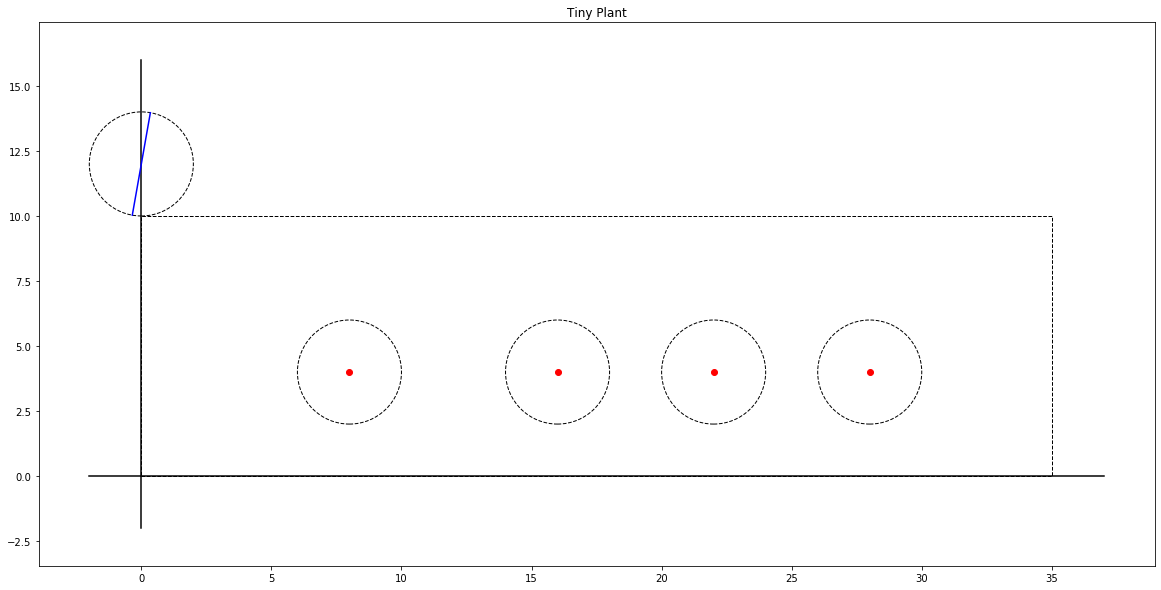

In [6]:
plant.draw()

In [7]:
state = State(plant, sun_angle=np.radians(60))
effects = state.get_effects(i=2, verbose=True)

Effects on heliostat 2: 

	* eta_aa = 0.991882
	* eta_cos = 0.793353
	* eta_sbm = 0.800000
	* received_rays / all_rays = 4 / 5
	* [not-shaded, not-blocked, not-missed] / all_rays = [5 4 5] / 5



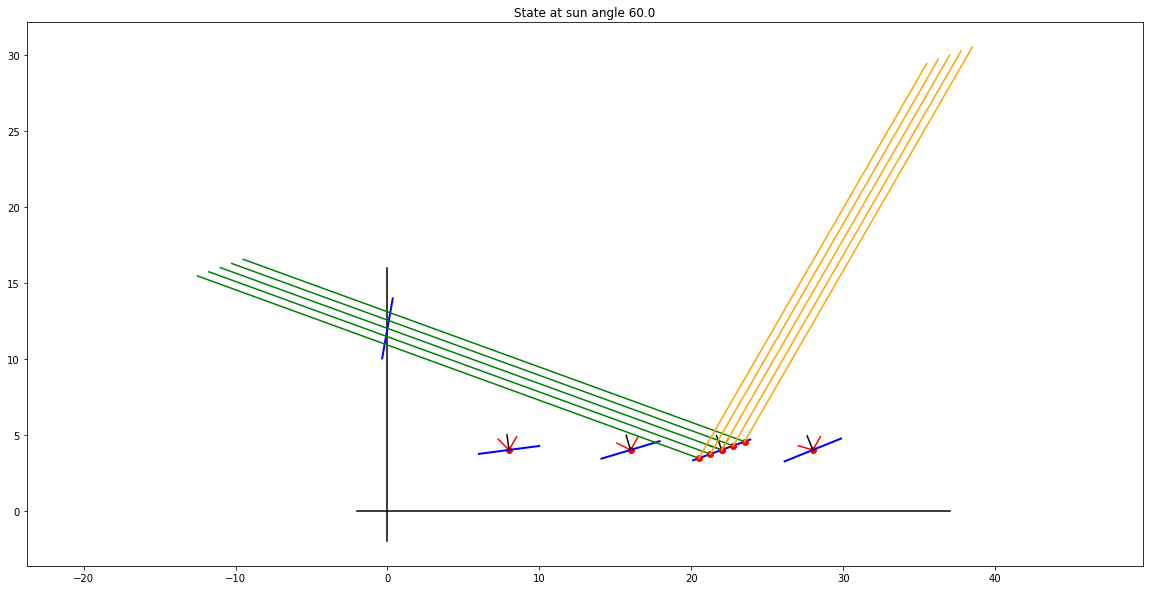

In [8]:
state.draw(i=2)

## Evaluation

In [9]:
energy, stats_df, powers = get_energy(plant, show_stats=True)

Tiny Plant with tiny-layout

	- energy = 41.57571483140898749298

	         mu_aa   mu_cos  mu_sbm
	- etas:  0.9919, 0.8207, 0.7676

	         pi_sha  pi_blo  pi_mis
	- sbms:  0.1235, 0.1618, 0.0000



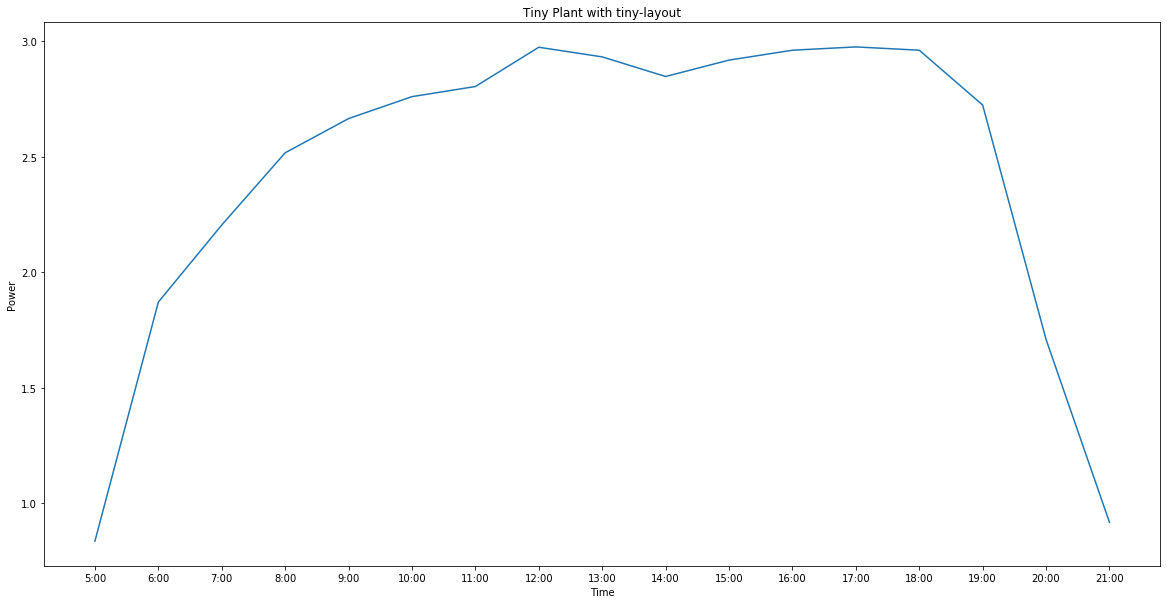

In [10]:
draw(plant, powers)

In [11]:
stats_df

,time,power,mu_aa,mu_cos,mu_sbm,pi_sha,pi_blo,pi_mis
0,5:00,0.835069,0.991882,0.382683,0.55,0.45,0.00,0.0
1,6:00,1.870280,0.991882,0.471397,1.00,0.00,0.00,0.0
2,7:00,2.204241,0.991882,0.555570,1.00,0.00,0.00,0.0
3,8:00,2.516973,0.991882,0.634393,1.00,0.00,0.00,0.0
4,9:00,2.665193,0.991882,0.707107,0.95,0.00,0.05,0.0
5,10:00,2.760247,0.991882,0.773010,0.90,0.00,0.10,0.0
6,11:00,2.804047,0.991882,0.831470,0.85,0.00,0.15,0.0
7,12:00,2.974190,0.991882,0.881921,0.85,0.00,0.15,0.0
8,13:00,2.932414,0.991882,0.923880,0.80,0.00,0.20,0.0
9,14:00,2.847516,0.991882,0.956940,0.75,0.00,0.25,0.0
